In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
import arviz as az

In [2]:
# set seed to make the results fully reproducible
seed: int = sum(map(ord, "location_scale"))
rng: np.random.Generator = np.random.default_rng(seed=seed)

az.style.use("arviz-darkgrid")
plt.rcParams["figure.dpi"] = 100
plt.rcParams["figure.facecolor"] = "white"

%config InlineBackend.figure_format = "retina"

In [3]:
(12 + 44 + 21 + 62 + 24) / 5

32.6

In [4]:
x = np.array([12, 44, 21, 62, 24])
np.mean(x)

32.6

In [5]:
np.average(x)

32.6

In [6]:
zero_one = np.array([1, 1, 1, 0])
result = sum(zero_one)
print(result) 

3


In [7]:
np.mean(zero_one)

0.75

In [8]:
np.mean(np.array([(True, True, True, False)]))

0.75

In [9]:
df = pd.read_csv("../data/STAR.csv")
df.head()

,classtype,reading,math,graduated
0,small,578,610,1
1,regular,612,612,1
2,regular,583,606,1
3,small,661,648,1
4,small,614,636,1


In [10]:
df.groupby("graduated").size()

graduated
0     166
1    1108
dtype: int64

In [11]:
df.groupby("graduated")["math"].mean().round(2)

graduated
0    606.64
1    635.33
Name: math, dtype: float64

In [12]:
df.groupby("graduated")["math"].describe().round(1)

,count,mean,std,min,25%,50%,75%,max
graduated,,,,,,,,
0,166.0,606.6,34.1,526.0,580.5,606.0,629.0,711.0
1,1108.0,635.3,38.1,515.0,609.5,634.0,659.0,774.0


In [13]:
not_graduated = df[df["graduated"] == 0].math
stats.trim_mean(not_graduated, 0.10)

605.6492537313433

In [14]:
graduated = df[df["graduated"] == 1].math
stats.trim_mean(graduated, 0.10)

634.4403153153153

In [15]:
# Quantili di ordine 0.1 e 0.9 per il gruppo di studenti che hanno completato la scuola superiore
[
    df[df["graduated"] == 1]["math"].quantile(0.1), 
    df[df["graduated"] == 1]["math"].quantile(0.9)
]

[588.0, 684.0]

In [16]:
# Quantili di ordine 0.1 e 0.9 per il gruppo di studenti che non hanno completato la scuola superiore
[
    df[df["graduated"] == 0]["math"].quantile(0.1),
    df[df["graduated"] == 0]["math"].quantile(0.9),
]

[564.5, 651.0]

In [17]:
sum((df["math"] - np.mean(df["math"])) ** 2) / len(df["math"])

1507.2328523125225

In [18]:
np.var(df["math"])

1507.2328523125225

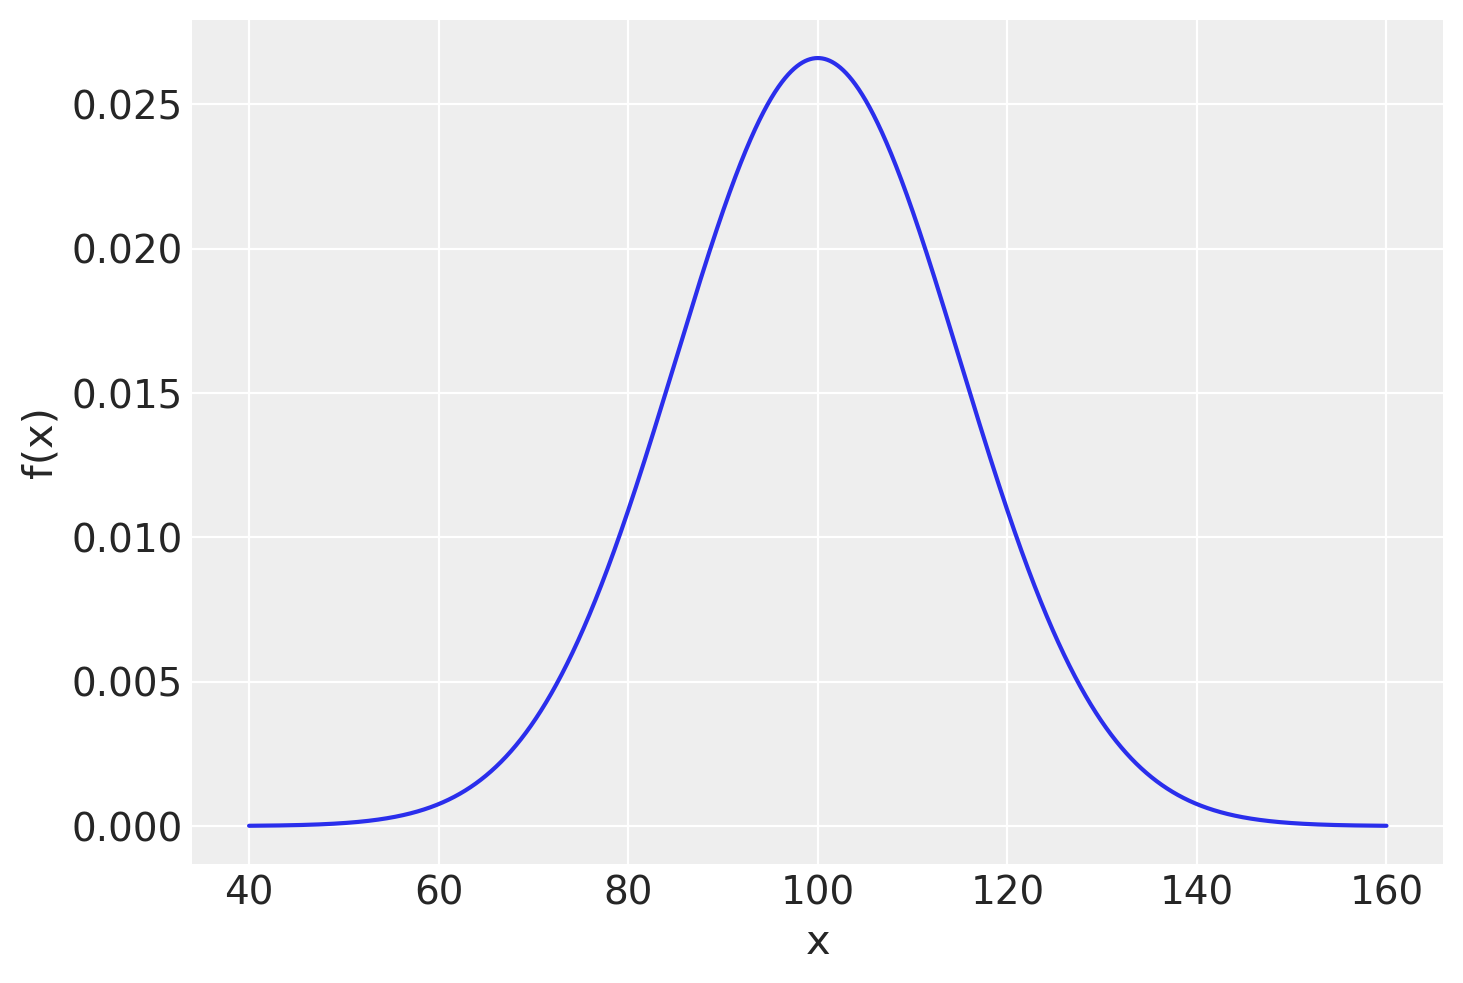

In [19]:
x = np.arange(100 - 4 * 15, 100 + 4 * 15, 0.001)

mu = 100
sigma = 15

pdf = stats.norm.pdf(x, mu, sigma)
plt.plot(x, pdf)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

In [20]:
x = rng.normal(loc=100, scale=15, size=4)
print(x)

[133.75543403 101.43900843  94.59994101  92.23138768]


In [21]:
np.var(x)

277.4320993427046

In [22]:
mu = 100
sigma = 15
size = 4
niter = 10
random_samples = []

for i in range(niter):
    one_sample = rng.normal(loc=mu, scale=sigma, size=size)
    random_samples.append(one_sample)

In [23]:
random_samples[0]

array([105.84924945, 124.12259109,  95.58010071,  76.35634967])

In [24]:
random_samples[9]

array([ 89.29531757, 106.32615516,  91.6023182 ,  90.68549989])

In [25]:
rs = np.array(random_samples)
rs

array([[105.84924945, 124.12259109,  95.58010071,  76.35634967],
       [ 80.23586783, 114.3021062 ,  98.54492676,  91.47149307],
       [114.26794026,  86.66403178,  79.74954446, 102.23174837],
       [110.22926012,  80.75554712, 100.93634803,  83.44336602],
       [ 80.68461566, 122.39378237, 115.0707391 ,  85.53365763],
       [ 82.42398628,  99.06628072,  95.40790879,  95.03682044],
       [ 86.56471564,  97.82411638,  98.28650923,  99.23388255],
       [120.24780337,  94.92211176,  87.6421954 ,  89.48037814],
       [ 89.06126415, 109.72357033, 119.31191461, 125.38475089],
       [ 89.29531757, 106.32615516,  91.6023182 ,  90.68549989]])

In [26]:
x_var = np.var(rs, axis=1)  # applichiamo la funzione su ciascuna riga
print(x_var)

[298.44010918 152.5955359  180.87367224 149.56472568 326.89426388
  39.64935846  26.73631903 171.07120901 189.71979388  47.47289476]


In [27]:
mu = 100
sigma = 15
size = 4
niter = 10000
random_samples = []

for i in range(niter):
    one_sample = rng.normal(loc=mu, scale=sigma, size=size)
    random_samples.append(one_sample)

rs = np.array(random_samples)
x_var = np.var(rs, ddof=0, axis=1)

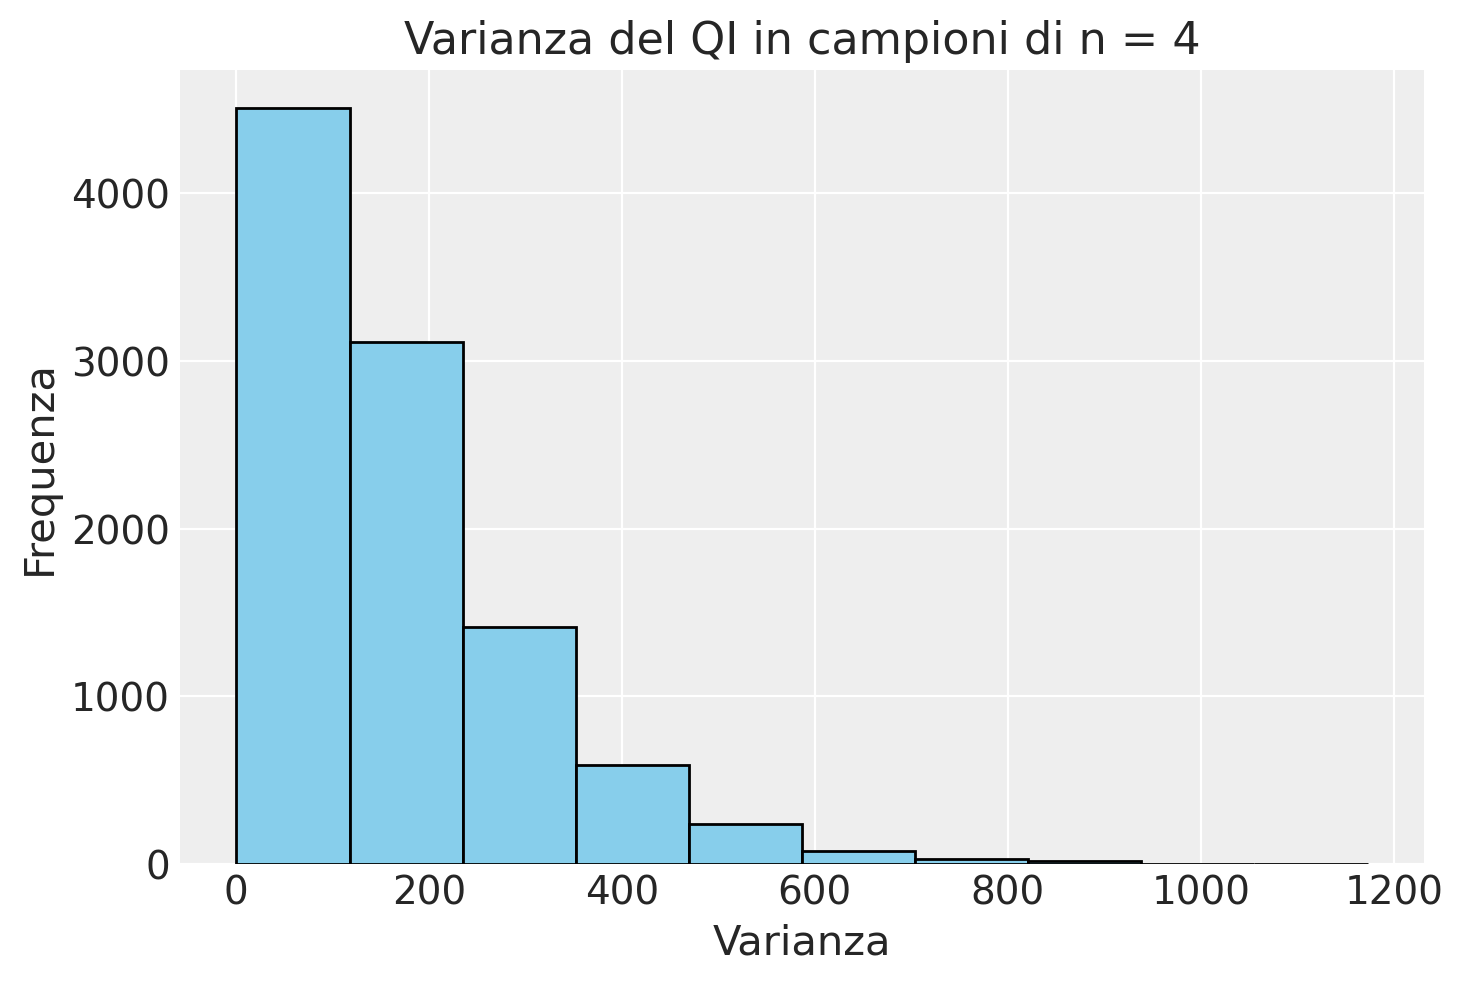

In [28]:
plt.hist(x_var, bins=10, color="skyblue", edgecolor="black")
plt.xlabel("Varianza")
plt.ylabel("Frequenza")
plt.title("Varianza del QI in campioni di n = 4")
plt.show()

In [29]:
np.mean(x_var)

166.4352384309161

In [30]:
mu = 100
sigma = 15
size = 4
niter = 10000
random_samples = []

for i in range(niter):
    one_sample = rng.normal(loc=mu, scale=sigma, size=size)
    random_samples.append(one_sample)

rs = np.array(random_samples)
x_var = np.var(rs, ddof=1, axis=1)

np.mean(x_var)

226.57333153886847

In [31]:
np.std(df.math)

38.82309689234648

In [32]:
df.groupby("graduated")["math"].std()

graduated
0    34.105746
1    38.130136
Name: math, dtype: float64

In [33]:
np.std(df["math"])

38.82309689234648

In [34]:
np.mean(np.abs(df.math - np.mean(df.math)))

30.9682664274501

In [35]:
1.4826 * np.median(np.abs(df["math"] - np.median(df["math"])))

41.5128

In [36]:
np.std(df["math"])

38.82309689234648

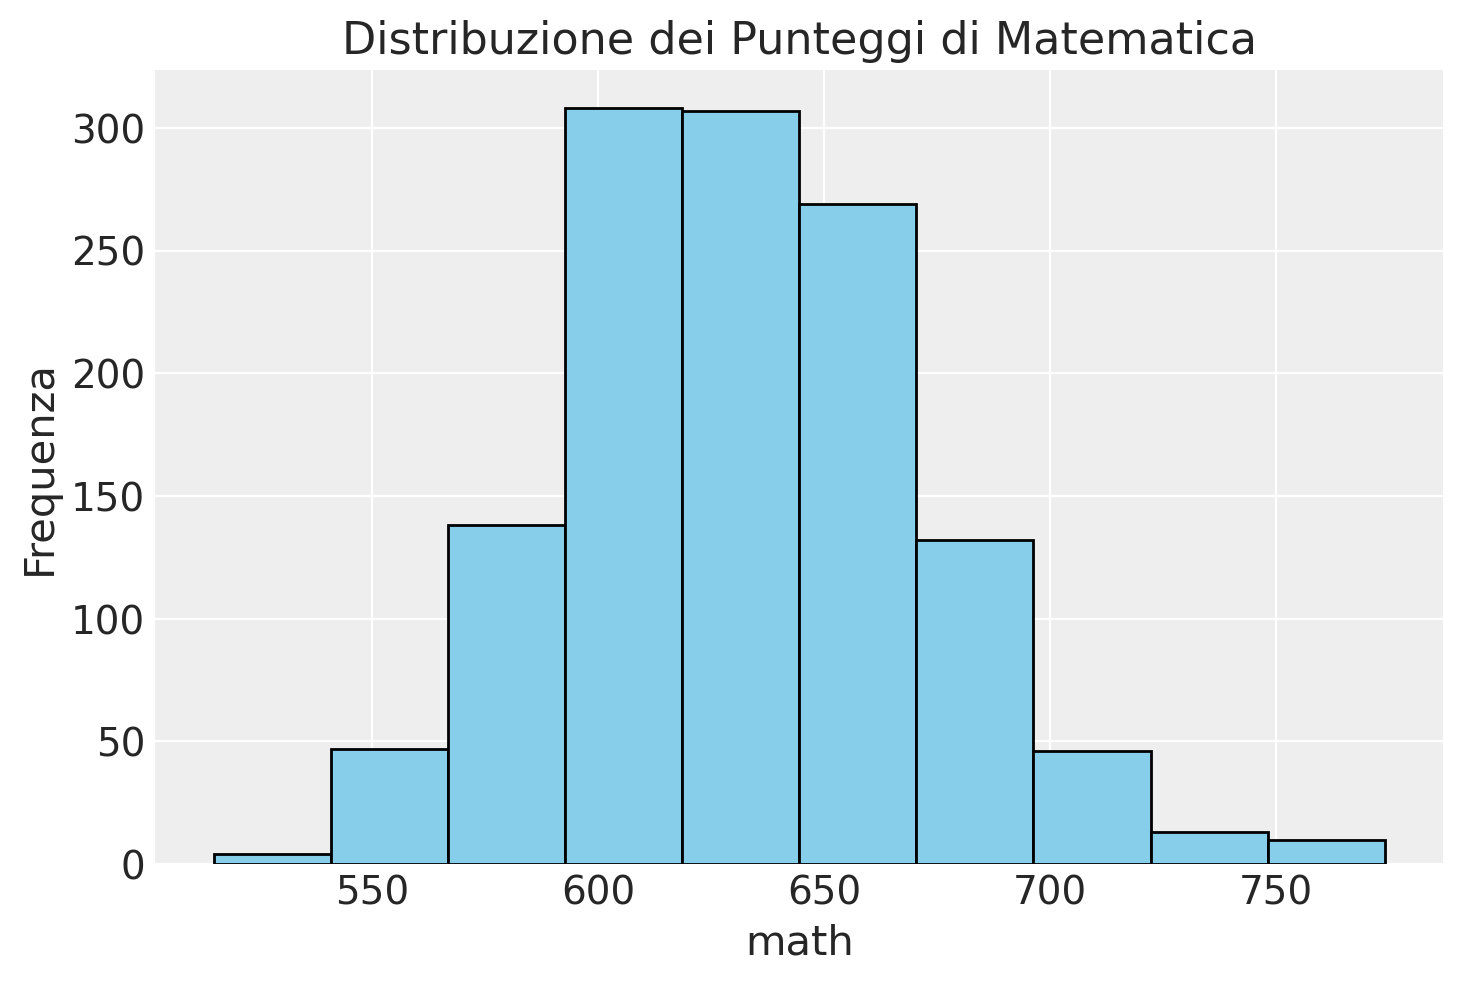

In [37]:
plt.hist(df["math"], bins=10, color="skyblue", edgecolor = "black")
plt.xlabel("math")
plt.ylabel("Frequenza")
plt.title("Distribuzione dei Punteggi di Matematica")
plt.show()

In [38]:
x = np.random.normal(loc=100, scale=15, size=10000)
1.4826 * np.median(np.abs(x - np.median(x)))

14.694076406131302

In [39]:
%load_ext watermark
%watermark -n -u -v -iv -w -m

Last updated: Sun Jun 16 2024

Python implementation: CPython
Python version       : 3.12.3
IPython version      : 8.25.0

Compiler    : Clang 16.0.6 
OS          : Darwin
Release     : 23.4.0
Machine     : arm64
Processor   : arm
CPU cores   : 8
Architecture: 64bit

matplotlib: 3.8.4
pandas    : 2.2.2
numpy     : 1.26.4
arviz     : 0.18.0
scipy     : 1.13.1
seaborn   : 0.13.2

Watermark: 2.4.3

